In [19]:
import torch
from torch import nn
import torchvision
from torchvision import datasets
from torchvision import transforms
from torchvision.transforms import ToTensor

import matplotlib.pyplot as plt

torch.__version__, torchvision.__version__

('2.5.1+cu124', '0.20.1+cu124')

In [20]:
train_data=datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor(),
    target_transform=None
)
test_data=datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor()
)

In [21]:
len(train_data),len(test_data)

(60000, 10000)

In [22]:
image,label=train_data[0]
image,label

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0039, 0.0000, 0.0000, 0.0510,
           0.2863, 0.0000, 0.0000, 0.0039, 

In [23]:
train_data.classes

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [24]:
train_data.class_to_idx

{'T-shirt/top': 0,
 'Trouser': 1,
 'Pullover': 2,
 'Dress': 3,
 'Coat': 4,
 'Sandal': 5,
 'Shirt': 6,
 'Sneaker': 7,
 'Bag': 8,
 'Ankle boot': 9}

In [25]:
image.shape,label

(torch.Size([1, 28, 28]), 9)

(-0.5, 27.5, 27.5, -0.5)

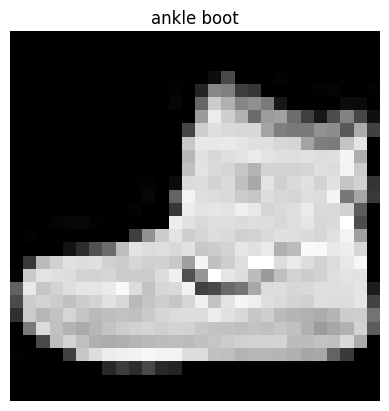

In [26]:
plt.imshow(image.squeeze(),cmap="gray")
plt.title("ankle boot");
plt.axis(False)

In [27]:
torch.manual_seed(42)
from torch.utils.data import DataLoader
BATCH_SIZE=32
train_dataloader=DataLoader(train_data,batch_size=BATCH_SIZE,shuffle=True)
test_dataloader=DataLoader(test_data,batch_size=BATCH_SIZE,shuffle=False)


In [28]:
train_features_batch,train_labels_batch=next(iter(train_dataloader))


In [29]:
len(train_dataloader),len(test_dataloader)

(1875, 313)

In [30]:
flatten_model=nn.Flatten()
x=train_features_batch[0]
output=flatten_model(x)
x.shape,output.shape

(torch.Size([1, 28, 28]), torch.Size([1, 784]))

In [31]:
class FashionMNIST(nn.Module):
  def __init__(self,
               input_shape: int,
               hidden_units: int,
               output_shape: int):
    super().__init__()
    self.layer_stack=nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features=input_shape,
                  out_features=hidden_units),
        nn.ReLU(),
        nn.Linear(in_features=hidden_units,
                  out_features=output_shape),
        nn.ReLU()

    )
  def forward(self,x):
    return self.layer_stack(x)



In [32]:
torch.manual_seed(42)

model_0=FashionMNIST(input_shape=28*28,
                     hidden_units=10,
                     output_shape=10).to("cpu")

model_0

FashionMNIST(
  (layer_stack): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=10, bias=True)
    (2): ReLU()
    (3): Linear(in_features=10, out_features=10, bias=True)
    (4): ReLU()
  )
)

In [33]:
loss_fn=nn.CrossEntropyLoss()
optimizer=torch.optim.SGD(params=model_0.parameters(),
                          lr=0.1)


In [34]:
from tqdm.auto import tqdm
torch.manual_seed(42)

epochs=3
for epoch in tqdm(range(epochs)):
  print(epoch)
  train_loss=0
  for batch, (X,y) in enumerate (train_dataloader):
    model_0.train()
    y_pred=model_0(X)
    loss=loss_fn(y_pred,y)
    train_loss+=loss
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
  train_loss/=len(train_dataloader)
  test_loss=0
  model_0.eval()
  with torch.inference_mode():
    for X_test,y_test in test_dataloader:
      test_pred=model_0(X_test)
      test_loss+=loss_fn(test_pred,y_test)
    test_loss/=len(test_dataloader)


  0%|          | 0/3 [00:00<?, ?it/s]

0
1
2


In [35]:
train_loss,test_loss

(tensor(0.6703, grad_fn=<DivBackward0>), tensor(0.6850))

In [36]:
torch.manual_seed(42)
def eval_model(model:torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_fn:torch.nn.Module,
               ):
  loss,acc=0,0
  model.eval()
  with torch.inference_mode():
    for X,y in data_loader:
      y_pred=model(X)
      loss+=loss_fn(y_pred,y)
    loss/=len(data_loader)
  return {"model_name": model.__class__.__name__,
          "model_loss": loss.item()}
model_0_results=eval_model(model_0,test_dataloader,loss_fn)
model_0_results

{'model_name': 'FashionMNIST', 'model_loss': 0.6850009560585022}

In [43]:
class FashionMNISTModelV2(nn.Module):
  def __init__(self,
               input_shape: int,
               hidden_units: int,
               output_shape: int):
    super().__init__()
    self.conv_block_1=nn.Sequential(
        nn.Conv2d(in_channels=input_shape,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=1),
        nn.ReLU(),
        nn.Conv2d(in_channels=hidden_units,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=1),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2)

    )
    self.conv_block_2=nn.Sequential(
        nn.Conv2d(in_channels=hidden_units,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=1),
        nn.ReLU(),
        nn.Conv2d(in_channels=hidden_units,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=1),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2)
    )
    self.classifier=nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features=hidden_units,
                  out_features=output_shape)
    )

  def forward(self,x):
    x=self.conv_block_1(x)
    x=self.conv_block_2(x)
    x=self.classifier(x)
    return x





In [45]:
torch.manual_seed(42)
model_2=FashionMNISTModelV2(input_shape=1,
                            hidden_units=10,
                            output_shape=10)

In [47]:
torch.manual_seed(42)
images=torch.randn(size=(32,3,64,64))
test_image=images[0].unsqueeze(0)


In [51]:
conv_layer=nn.Conv2d(in_channels=3,
                     out_channels=10,
                     kernel_size=3,
                     stride=2,
                     padding=0)

conv_output=conv_layer(test_image)
conv_output.shape

torch.Size([1, 10, 31, 31])

In [52]:
max_pool_layer=nn.MaxPool2d(kernel_size=2)
test_output=max_pool_layer(conv_output)
test_output.shape

torch.Size([1, 10, 15, 15])

In [ ]:
loss_fn=nn.CrossEntropyLoss()
optimizer=